In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [51]:
df = pd.read_excel("./Data/data_LR_2.xlsx")

df.head()

,Unnamed: 0,Year,TeamA,TeamB,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,TeamA_3P_zscore,TeamA_3PA_zscore,...,TeamB_3PA_zscore,TeamB_FT_zscore,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,TeamA_SRS,TeamB_SRS,result
0,0,2019,Duke,North Dakota St.,1.949629,1.320741,2.094006,0.542623,0.489724,0.919852,...,0.395988,-0.889213,-1.207277,0.293780,0.140931,0.517558,1.174393,0.709851,-1.606147,1
1,1,2019,VCU,UCF,-1.605961,-0.868734,-0.695939,-0.464692,-1.959867,-0.484132,...,-0.289175,-0.392476,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,-0.770028,-0.427092,0
2,2,2019,Mississippi St.,Liberty,-0.551816,-1.260119,-0.458324,-0.589242,-0.341847,-0.797386,...,-0.274394,-0.572308,-0.598060,1.714265,1.741012,0.996409,0.464452,0.291783,-2.017023,0
3,3,2019,Virginia Tech,Saint Louis,-1.236185,-2.117061,-2.279128,-3.027442,1.128645,0.946198,...,-0.876447,-1.615684,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,-0.000355,-0.898120,1
4,4,2019,Maryland,Belmont,0.226582,1.007037,-0.090884,0.091227,0.562519,1.063191,...,1.423138,-0.871030,-1.041602,1.527556,1.772672,0.635841,0.341354,0.409210,-1.746914,1


In [52]:
df.columns

Index(['Unnamed: 0', 'Year', 'TeamA', 'TeamB', 'TeamA_FG_zscore',
       'TeamA_FGA_zscore', 'TeamA_2P_zscore', 'TeamA_2PA_zscore',
       'TeamA_3P_zscore', 'TeamA_3PA_zscore', 'TeamA_FT_zscore',
       'TeamA_FTA_zscore', 'TeamA_FG%_zscore', 'TeamA_2P%_zscore',
       'TeamA_3P%_zscore', 'TeamA_FT%_zscore', 'TeamB_FG_zscore',
       'TeamB_FGA_zscore', 'TeamB_2P_zscore', 'TeamB_2PA_zscore',
       'TeamB_3P_zscore', 'TeamB_3PA_zscore', 'TeamB_FT_zscore',
       'TeamB_FTA_zscore', 'TeamB_FG%_zscore', 'TeamB_2P%_zscore',
       'TeamB_3P%_zscore', 'TeamB_FT%_zscore', 'TeamA_SRS', 'TeamB_SRS',
       'result'],
      dtype='object')

In [53]:
training_set = df
training_set["Winner"] = np.where(training_set['result'] == 1, training_set['TeamA'], training_set['TeamB'])
training_set["W/L"] = np.where(training_set['result'] == 1, 'W', 'L')


training_set.head()

,Unnamed: 0,Year,TeamA,TeamB,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,TeamA_3P_zscore,TeamA_3PA_zscore,...,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,TeamA_SRS,TeamB_SRS,result,Winner,W/L
0,0,2019,Duke,North Dakota St.,1.949629,1.320741,2.094006,0.542623,0.489724,0.919852,...,-1.207277,0.293780,0.140931,0.517558,1.174393,0.709851,-1.606147,1,Duke,W
1,1,2019,VCU,UCF,-1.605961,-0.868734,-0.695939,-0.464692,-1.959867,-0.484132,...,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,-0.770028,-0.427092,0,UCF,L
2,2,2019,Mississippi St.,Liberty,-0.551816,-1.260119,-0.458324,-0.589242,-0.341847,-0.797386,...,-0.598060,1.714265,1.741012,0.996409,0.464452,0.291783,-2.017023,0,Liberty,L
3,3,2019,Virginia Tech,Saint Louis,-1.236185,-2.117061,-2.279128,-3.027442,1.128645,0.946198,...,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,-0.000355,-0.898120,1,Virginia Tech,W
4,4,2019,Maryland,Belmont,0.226582,1.007037,-0.090884,0.091227,0.562519,1.063191,...,-1.041602,1.527556,1.772672,0.635841,0.341354,0.409210,-1.746914,1,Maryland,W


In [54]:
"""training_set = training_set[['TeamA', 'TeamB', "Winner", "W/L", "TeamA_SRS", 
       'TeamB_SRS', 'TeamA_FG_zscore', 'TeamA_FGA_zscore' , 'TeamA_2P_zscore', 
       'TeamA_2PA_zscore',
       'TeamA_3P_zscore', 'TeamA_3PA_zscore', 'TeamA_FT_zscore',
       'TeamA_FTA_zscore', 'TeamA_FG%_zscore', 'TeamA_2P%_zscore',
       'TeamA_3P%_zscore', 'TeamA_FT%_zscore', 'TeamB_FG_zscore',
       'TeamB_FGA_zscore', 'TeamB_2P_zscore', 'TeamB_2PA_zscore',
       'TeamB_3P_zscore', 'TeamB_3PA_zscore', 'TeamB_FT_zscore',
       'TeamB_FTA_zscore', 'TeamB_FG%_zscore', 'TeamB_2P%_zscore',
       'TeamB_3P%_zscore', 'TeamB_FT%_zscore',"Year", 'result']]"""
training_set = training_set[['TeamA', 'TeamB', "Winner", "W/L", "TeamA_SRS", "TeamB_SRS", 'result', 'Year',
                             "TeamA_FGA_zscore", "TeamA_2P%_zscore", 
                             "TeamB_3PA_zscore", "TeamB_FT%_zscore", 
                             'TeamA_3P%_zscore','TeamA_2P%_zscore' ]]
training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA


training_set.head(15)

,TeamA,TeamB,Winner,W/L,TeamA_SRS,TeamB_SRS,result,Year,TeamA_FGA_zscore,TeamA_2P%_zscore,TeamB_3PA_zscore,TeamB_FT%_zscore,TeamA_3P%_zscore,TeamA_2P%_zscore
0,Duke,North Dakota St.,Duke,W,0.709851,-1.606147,1,2019,1.320741,2.165591,0.395988,1.174393,-0.587263,2.165591
1,VCU,UCF,UCF,L,-0.770028,-0.427092,0,2019,-0.868734,-0.373673,-0.289175,-2.918627,-3.434997,-0.373673
2,Mississippi St.,Liberty,Liberty,L,0.291783,-2.017023,0,2019,-1.260119,0.211279,-0.274394,0.464452,0.889557,0.211279
3,Virginia Tech,Saint Louis,Virginia Tech,W,-0.000355,-0.898120,1,2019,-2.117061,0.787035,-0.876447,-1.539388,0.640467,0.787035
4,Maryland,Belmont,Maryland,W,0.409210,-1.746914,1,2019,1.007037,-0.301536,1.423138,0.341354,-0.890119,-0.301536
5,LSU,Yale,LSU,W,0.191477,-1.474249,1,2019,1.460148,0.711203,1.139321,1.027182,-1.454316,0.711203
6,Louisville,Minnesota,Minnesota,L,0.580732,0.531463,0,2019,0.166453,-0.270839,-0.994333,-1.066749,-1.054159,-0.270839
7,Michigan St.,Bradley,Michigan St.,W,0.715487,-1.444764,1,2019,-0.666417,-0.485824,-0.237956,0.007290,-0.235876,-0.485824
8,North Carolina,Iona,North Carolina,W,0.666241,-2.201532,1,2019,2.284829,1.565986,2.650522,-0.449634,0.172149,1.565986
9,Utah St.,Washington,Washington,L,-1.088066,-0.158883,0,2019,-0.820200,-0.966538,-0.189042,-0.106240,-0.137852,-0.966538


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["TeamA"]=encoder.fit_transform(training_set["TeamA"])
converted_season["TeamB"]=encoder.fit_transform(training_set["TeamB"])


converted_season.head(15)

,TeamA,TeamB,Winner,W/L,TeamA_SRS,TeamB_SRS,result,Year,TeamA_FGA_zscore,TeamA_2P%_zscore,TeamB_3PA_zscore,TeamB_FT%_zscore,TeamA_3P%_zscore,TeamA_2P%_zscore
0,12,53,Duke,W,0.709851,-1.606147,1,2019,1.320741,2.165591,0.395988,1.174393,-0.587263,2.165591
1,59,83,UCF,L,-0.770028,-0.427092,0,2019,-0.868734,-0.373673,-0.289175,-2.918627,-3.434997,-0.373673
2,32,36,Liberty,L,0.291783,-2.017023,0,2019,-1.260119,0.211279,-0.274394,0.464452,0.889557,0.211279
3,62,68,Virginia Tech,W,-0.000355,-0.898120,1,2019,-2.117061,0.787035,-0.876447,-1.539388,0.640467,0.787035
4,26,5,Maryland,W,0.409210,-1.746914,1,2019,1.007037,-0.301536,1.423138,0.341354,-0.890119,-0.301536
5,23,99,LSU,W,0.191477,-1.474249,1,2019,1.460148,0.711203,1.139321,1.027182,-1.454316,0.711203
6,24,45,Minnesota,L,0.580732,0.531463,0,2019,0.166453,-0.270839,-0.994333,-1.066749,-1.054159,-0.270839
7,29,6,Michigan St.,W,0.715487,-1.444764,1,2019,-0.666417,-0.485824,-0.237956,0.007290,-0.235876,-0.485824
8,35,31,North Carolina,W,0.666241,-2.201532,1,2019,2.284829,1.565986,2.650522,-0.449634,0.172149,1.565986
9,58,93,Washington,L,-1.088066,-0.158883,0,2019,-0.820200,-0.966538,-0.189042,-0.106240,-0.137852,-0.966538


In [56]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['TeamA'], converted_season['TeamB'])

converted_season[['TeamA', 'TeamB', 'Winner', 'result']].head(15)

,TeamA,TeamB,Winner,result
0,12,53,12,1
1,59,83,83,0
2,32,36,36,0
3,62,68,62,1
4,26,5,26,1
5,23,99,23,1
6,24,45,45,0
7,29,6,29,1
8,35,31,35,1
9,58,93,93,0


In [57]:
converted_season = converted_season.drop(columns=["W/L", "result"])

converted_season.head()

,TeamA,TeamB,Winner,TeamA_SRS,TeamB_SRS,Year,TeamA_FGA_zscore,TeamA_2P%_zscore,TeamB_3PA_zscore,TeamB_FT%_zscore,TeamA_3P%_zscore,TeamA_2P%_zscore
0,12,53,12,0.709851,-1.606147,2019,1.320741,2.165591,0.395988,1.174393,-0.587263,2.165591
1,59,83,83,-0.770028,-0.427092,2019,-0.868734,-0.373673,-0.289175,-2.918627,-3.434997,-0.373673
2,32,36,36,0.291783,-2.017023,2019,-1.260119,0.211279,-0.274394,0.464452,0.889557,0.211279
3,62,68,62,-0.000355,-0.898120,2019,-2.117061,0.787035,-0.876447,-1.539388,0.640467,0.787035
4,26,5,26,0.409210,-1.746914,2019,1.007037,-0.301536,1.423138,0.341354,-0.890119,-0.301536


In [58]:
converted_season.loc[converted_season["TeamA"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["TeamA"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head(15)

,TeamA,TeamB,Winner,TeamA_SRS,TeamB_SRS,Year,TeamA_FGA_zscore,TeamA_2P%_zscore,TeamB_3PA_zscore,TeamB_FT%_zscore,TeamA_3P%_zscore,TeamA_2P%_zscore,team_game_win
0,12,53,12,0.709851,-1.606147,2019,1.320741,2.165591,0.395988,1.174393,-0.587263,2.165591,2.0
1,59,83,83,-0.770028,-0.427092,2019,-0.868734,-0.373673,-0.289175,-2.918627,-3.434997,-0.373673,1.0
2,32,36,36,0.291783,-2.017023,2019,-1.260119,0.211279,-0.274394,0.464452,0.889557,0.211279,1.0
3,62,68,62,-0.000355,-0.898120,2019,-2.117061,0.787035,-0.876447,-1.539388,0.640467,0.787035,2.0
4,26,5,26,0.409210,-1.746914,2019,1.007037,-0.301536,1.423138,0.341354,-0.890119,-0.301536,2.0
5,23,99,23,0.191477,-1.474249,2019,1.460148,0.711203,1.139321,1.027182,-1.454316,0.711203,2.0
6,24,45,45,0.580732,0.531463,2019,0.166453,-0.270839,-0.994333,-1.066749,-1.054159,-0.270839,1.0
7,29,6,29,0.715487,-1.444764,2019,-0.666417,-0.485824,-0.237956,0.007290,-0.235876,-0.485824,2.0
8,35,31,35,0.666241,-2.201532,2019,2.284829,1.565986,2.650522,-0.449634,0.172149,1.565986,2.0
9,58,93,93,-1.088066,-0.158883,2019,-0.820200,-0.966538,-0.189042,-0.106240,-0.137852,-0.966538,1.0


Correlation Matrix

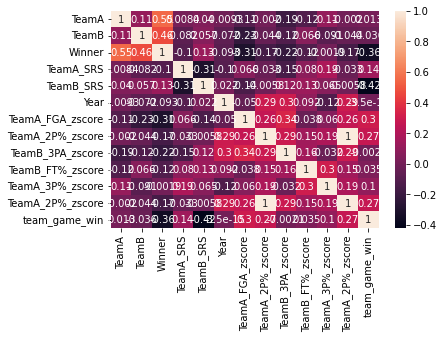

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

In [60]:
training_set = converted_season.loc[converted_season["Year"] <= 2018] # training set 

testing_set = converted_season.loc[(converted_season["Year"] == 2019)] # testing set CHANGE THIS

print(len(testing_set))

testing_set.head()


32


,TeamA,TeamB,Winner,TeamA_SRS,TeamB_SRS,Year,TeamA_FGA_zscore,TeamA_2P%_zscore,TeamB_3PA_zscore,TeamB_FT%_zscore,TeamA_3P%_zscore,TeamA_2P%_zscore,team_game_win
0,12,53,12,0.709851,-1.606147,2019,1.320741,2.165591,0.395988,1.174393,-0.587263,2.165591,2.0
1,59,83,83,-0.770028,-0.427092,2019,-0.868734,-0.373673,-0.289175,-2.918627,-3.434997,-0.373673,1.0
2,32,36,36,0.291783,-2.017023,2019,-1.260119,0.211279,-0.274394,0.464452,0.889557,0.211279,1.0
3,62,68,62,-0.000355,-0.898120,2019,-2.117061,0.787035,-0.876447,-1.539388,0.640467,0.787035,2.0
4,26,5,26,0.409210,-1.746914,2019,1.007037,-0.301536,1.423138,0.341354,-0.890119,-0.301536,2.0


In [61]:
training_set = training_set.drop(["Year"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year"], axis=1)

X_both = training_set.append(testing_set, ignore_index=True)
Y_both = X_both["team_game_win"]
X_both = X_both.drop(["team_game_win"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values

print(len(X_train))
print(len(X_test))
X_train[:5]



96
32


C:\Users\divys\AppData\Local\Temp\ipykernel_1692\135964952.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_both = training_set.append(testing_set, ignore_index=True)


array([[60.        , 66.        , 60.        ,  0.32752515, -1.95959605,
        -0.97392167,  1.95016338,  0.13444375,  1.47994617,  1.06350375,
         1.95016338],
       [62.        ,  1.        ,  1.        , -0.13230154,  0.43132601,
        -0.21995796,  1.61576606,  0.1068829 , -1.34132758,  0.6552349 ,
         1.61576606],
       [63.        , 48.        , 63.        ,  0.27679893, -1.86803893,
        -0.29234719, -0.99502747,  0.21845236,  0.63850813,  0.85247781,
        -0.99502747],
       [64.        , 41.        , 41.        , -0.29733494, -1.27868262,
         1.90735843,  0.40413791,  1.51660318,  0.72148155,  0.98303828,
         0.40413791],
       [13.        , 73.        , 13.        ,  0.39274121, -0.87667353,
         0.311431  , -0.74618353,  0.67643654,  1.29561864,  0.53919503,
        -0.74618353]])

In [62]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

Y_train

array([2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
       1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
       2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
       2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2.])

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [64]:
kernels = ["linear", "rbf", "poly"]
# CS = [0.1, 1, 10]
CS = [10]

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="linear")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    linear_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))

----------
C Value:  10
Precision:  1.0  | Recall:  0.6666666666666666  | Accuracy:  0.875  | F1 Score:  0.8


In [66]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="rbf")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    rbf_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))

----------
C Value:  10
Precision:  0.8  | Recall:  0.6666666666666666  | Accuracy:  0.8125  | F1 Score:  0.7272727272727272


In [67]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="poly")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.625  | Recall:  0.4166666666666667  | Accuracy:  0.6875  | F1 Score:  0.5


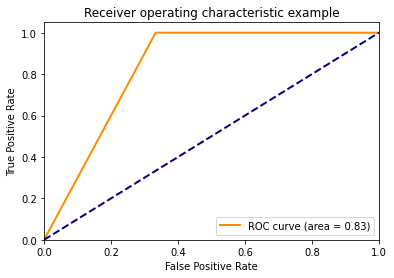

In [68]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test - 1, linear_ypred - 1)

# Compute the AUC (area under the curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

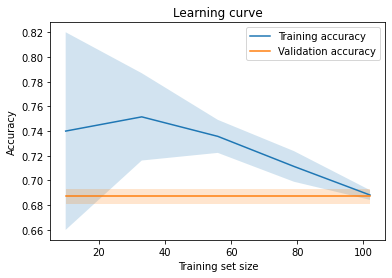

In [69]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


# Create an SVM model
model = SVC(kernel='rbf', C=0.1)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_both, Y_both, cv=5, scoring='accuracy')

# Compute the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning curve')
plt.show()

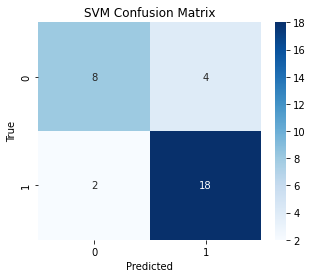

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test - 1, rbf_ypred - 1)

plt.figure(figsize=(5,4))

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()